# Machine learning model for Dublin Bikes

## 1. Dataset cleaning

### Import relevant libraries

In [74]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import timeit

### Read stations dataset & show first 5 lines

In [75]:
df = pd.read_csv('original_stations_dataset.csv')
df.head()

,station_id,last_updated,name,address,position_lat,position_long,banking,bonus,bike_stands,available_stands,available_bikes,status
0,2,1647621666,BLESSINGTON STREET,Blessington Street,53.356769,-6.26814,0,0,20,19,1,OPEN
1,2,1647621920,BLESSINGTON STREET,Blessington Street,53.356769,-6.26814,0,0,20,20,0,OPEN
2,2,1647622526,BLESSINGTON STREET,Blessington Street,53.356769,-6.26814,0,0,20,20,0,OPEN
3,2,1647623132,BLESSINGTON STREET,Blessington Street,53.356769,-6.26814,0,0,20,20,0,OPEN
4,2,1647623738,BLESSINGTON STREET,Blessington Street,53.356769,-6.26814,0,0,20,20,0,OPEN


In [76]:
df.shape

(339431, 12)

In [229]:
dfw = pd.read_csv('original_weather_data.csv')
dfw.head()

,station_id,datetime,weather_symbol,symbol,temperature,wind_direction,wind_cardinality,wind_speed,humidity,pressure_hPa,cloudiness,precipitation_mm,precipitation_probability
0,2,1647626400,1,Sunny,9.8,105.9,E,7.56,76.4,1040.4,0.0,0.0,0.0
1,2,1647630000,1,Sunny,9.2,128.9,SE,7.56,76.2,1040.5,0.0,0.0,0.0
2,2,1647633600,1,Sunny,7.9,112.3,E,17.64,86.8,1040.7,1.6,0.0,0.0
3,2,1647637200,1,Sunny,7.5,119.0,SE,10.80,89.8,1040.2,2.8,0.0,0.0
4,2,1647640800,2,Lightly Cloudy,7.2,95.7,E,9.00,92.5,1039.6,18.3,0.0,0.0


In [78]:
dfw.shape

(71490, 13)

### Convert timestamp to datetime and sort by datetime

In [79]:
df['datetime'] = pd.to_datetime(df['last_updated'], unit='s')
df = df.drop('last_updated', 1)
df = df.sort_values(by='datetime')
df.head()

/var/folders/s7/_g0553z1513_132nj099x1yw0000gn/T/ipykernel_8419/2200734558.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('last_updated', 1)


,station_id,name,address,position_lat,position_long,banking,bonus,bike_stands,available_stands,available_bikes,status,datetime
266772,93,HEUSTON STATION (CENTRAL),Heuston Station (Central),53.346603,-6.296924,0,0,40,3,37,OPEN,2022-03-18 16:34:26
218742,76,MARKET STREET SOUTH,Market Street South,53.342296,-6.287661,0,0,38,30,8,OPEN,2022-03-18 16:34:28
227825,79,ECCLES STREET EAST,Eccles Street East,53.358115,-6.265601,0,0,27,23,4,OPEN,2022-03-18 16:34:43
312604,109,BUCKINGHAM STREET LOWER,Buckingham Street Lower,53.353331,-6.249319,0,0,29,7,22,OPEN,2022-03-18 16:34:45
131023,47,HERBERT STREET,Herbert Street,53.335742,-6.245510,0,0,40,31,9,OPEN,2022-03-18 16:35:11


In [80]:
df.tail()

,station_id,name,address,position_lat,position_long,banking,bonus,bike_stands,available_stands,available_bikes,status,datetime
118238,41,HARCOURT TERRACE,Harcourt Terrace,53.332763,-6.257942,0,0,20,19,1,OPEN,2022-04-11 14:59:05
146829,51,YORK STREET WEST,York Street West,53.339334,-6.264699,0,0,40,18,22,OPEN,2022-04-11 14:59:13
174060,60,NORTH CIRCULAR ROAD,North Circular Road,53.359624,-6.260348,0,0,30,22,8,OPEN,2022-04-11 14:59:13
245160,85,ROTHE ABBEY,Rothe Abbey,53.338776,-6.303950,0,0,35,20,15,OPEN,2022-04-11 14:59:15
269516,93,HEUSTON STATION (CENTRAL),Heuston Station (Central),53.346603,-6.296924,0,0,40,16,24,OPEN,2022-04-11 14:59:17


In [81]:
dfw['datetime'] = pd.to_datetime(dfw['datetime'], unit='s')
dfw = dfw.sort_values(by='datetime')
dfw.head()

,station_id,datetime,weather_symbol,symbol,temperature,wind_direction,wind_cardinality,wind_speed,humidity,pressure_hPa,cloudiness,precipitation_mm,precipitation_probability
0,2,2022-03-18 18:00:00,1,Sunny,9.8,105.9,E,7.56,76.4,1040.4,0.0,0.0,0.0
3240,7,2022-03-18 18:00:00,1,Sunny,9.8,89.4,E,7.92,77.0,1040.3,0.0,0.0,0.0
54432,92,2022-03-18 18:00:00,1,Sunny,9.7,89.4,E,7.92,77.0,1040.3,0.0,0.0,0.0
53784,91,2022-03-18 18:00:00,1,Sunny,9.8,109.8,E,5.04,75.7,1040.3,0.0,0.0,0.0
53136,90,2022-03-18 18:00:00,1,Sunny,9.9,109.8,E,5.04,75.7,1040.3,0.0,0.0,0.0


In [82]:
dfw.tail()

,station_id,datetime,weather_symbol,symbol,temperature,wind_direction,wind_cardinality,wind_speed,humidity,pressure_hPa,cloudiness,precipitation_mm,precipitation_probability
66095,109,2022-04-14 17:00:00,4,Cloudy,11.1,164.1,S,10.08,88.3,1019.5,98.8,0.0,27.6
34343,58,2022-04-14 17:00:00,4,Cloudy,11.1,166.5,S,11.16,88.2,1019.5,98.8,0.0,27.5
7127,12,2022-04-14 17:00:00,4,Cloudy,11.3,167.2,S,9.36,88.1,1019.5,98.8,0.0,27.6
59615,99,2022-04-14 17:00:00,4,Cloudy,11.0,165.1,S,10.44,88.3,1019.5,98.8,0.0,27.5
71489,507,2022-04-14 17:00:00,4,Cloudy,11.1,163.5,S,10.80,88.3,1019.5,98.8,0.0,27.6


### Select features to be used in the prediction model

<b>Stations Dataset</b>

Currently these are the features in the dataset: station_id, name, address, position_lat, position_long, banking, bonus, bike_stands, available_stands, available_bikes, status, and datetime.

Identifiers of the dataset include station_id, name, address, position_lat, and position_long. Hence, I will drop those columns except station_id as only 1 identifier is required.

status has only two values OPEN and CLOSE, and most are open so we will drop this column as well.

banking, bonus, and bike_stands will be included for now. If it proves to be ineffectual later on, we will drop them as well.

'last_updated' was a datetime in timestamp format, which had been converted and dropped.

<b>Weather Dataset</b>
    
Currently these are the features in this dataset: station_id, datetime, weather_symbol, symbol, temperature, wind_direction, wind_cardinality, wind_speed, humidity, pressure_hPa, cloudiness, precipitation_mm, and precipitation_probability.

'symbol' is the descriptive symbol for the weather_symbol code. This will be dropped as only the code is required for the model.



In [83]:
# Drop identifiers except stations_id and status
df = df.drop('name', 1)
df = df.drop('position_lat', 1)
df = df.drop('position_long', 1)
df = df.drop('address', 1)
df = df.drop('status', 1)
df.shape

/var/folders/s7/_g0553z1513_132nj099x1yw0000gn/T/ipykernel_8419/402340957.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('name', 1)
/var/folders/s7/_g0553z1513_132nj099x1yw0000gn/T/ipykernel_8419/402340957.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('position_lat', 1)
/var/folders/s7/_g0553z1513_132nj099x1yw0000gn/T/ipykernel_8419/402340957.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('position_long', 1)
/var/folders/s7/_g0553z1513_132nj099x1yw0000gn/T/ipykernel_8419/402340957.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('address', 1)
/var/folders/s7/_g0553z1513_132n

(339431, 7)

In [84]:
df.head()

,station_id,banking,bonus,bike_stands,available_stands,available_bikes,datetime
266772,93,0,0,40,3,37,2022-03-18 16:34:26
218742,76,0,0,38,30,8,2022-03-18 16:34:28
227825,79,0,0,27,23,4,2022-03-18 16:34:43
312604,109,0,0,29,7,22,2022-03-18 16:34:45
131023,47,0,0,40,31,9,2022-03-18 16:35:11


In [85]:
# Weather dataset: drop symbol and wind_cardinality
dfw = dfw.drop('symbol', 1)
dfw = dfw.drop('wind_cardinality', 1)

/var/folders/s7/_g0553z1513_132nj099x1yw0000gn/T/ipykernel_8419/2120202497.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dfw = dfw.drop('symbol', 1)
/var/folders/s7/_g0553z1513_132nj099x1yw0000gn/T/ipykernel_8419/2120202497.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dfw = dfw.drop('wind_cardinality', 1)


In [86]:
dfw.head()

,station_id,datetime,weather_symbol,temperature,wind_direction,wind_speed,humidity,pressure_hPa,cloudiness,precipitation_mm,precipitation_probability
0,2,2022-03-18 18:00:00,1,9.8,105.9,7.56,76.4,1040.4,0.0,0.0,0.0
3240,7,2022-03-18 18:00:00,1,9.8,89.4,7.92,77.0,1040.3,0.0,0.0,0.0
54432,92,2022-03-18 18:00:00,1,9.7,89.4,7.92,77.0,1040.3,0.0,0.0,0.0
53784,91,2022-03-18 18:00:00,1,9.8,109.8,5.04,75.7,1040.3,0.0,0.0,0.0
53136,90,2022-03-18 18:00:00,1,9.9,109.8,5.04,75.7,1040.3,0.0,0.0,0.0


### Combine datasets

Next, we will combine the two datasets. Since the availabilites scrapper is updated every 5 mins while the weather data is updated every hour, we will need to use pd.merge_asof to merge these dataframes based on closest DateTime. Nan values are expected and will be dropped.

In [87]:
# Combine dataset
combined = pd.merge_asof(df, dfw, on="datetime", by="station_id")
combined.head()

,station_id,banking,bonus,bike_stands,available_stands,available_bikes,datetime,weather_symbol,temperature,wind_direction,wind_speed,humidity,pressure_hPa,cloudiness,precipitation_mm,precipitation_probability
0,93,0,0,40,3,37,2022-03-18 16:34:26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,76,0,0,38,30,8,2022-03-18 16:34:28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,79,0,0,27,23,4,2022-03-18 16:34:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,109,0,0,29,7,22,2022-03-18 16:34:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,47,0,0,40,31,9,2022-03-18 16:35:11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
combined.shape

(339431, 16)

In [89]:
# Check number of rows with nan values
combined.isna().sum()

station_id                      0
banking                         0
bonus                           0
bike_stands                     0
available_stands                0
available_bikes                 0
datetime                        0
weather_symbol               1126
temperature                  1126
wind_direction               1126
wind_speed                   1126
humidity                     1126
pressure_hPa                 1126
cloudiness                   1126
precipitation_mm             1126
precipitation_probability    1126
dtype: int64

In [90]:
# Drop these rows
combined = combined.dropna()
combined.head()

,station_id,banking,bonus,bike_stands,available_stands,available_bikes,datetime,weather_symbol,temperature,wind_direction,wind_speed,humidity,pressure_hPa,cloudiness,precipitation_mm,precipitation_probability
1098,88,0,0,30,17,13,2022-03-18 18:00:00,1.0,9.7,89.4,7.92,77.0,1040.3,0.0,0.0,0.0
1099,90,0,0,40,28,12,2022-03-18 18:00:02,1.0,9.9,109.8,5.04,75.7,1040.3,0.0,0.0,0.0
1100,94,0,0,40,38,2,2022-03-18 18:00:10,1.0,9.8,89.4,7.92,77.0,1040.3,0.0,0.0,0.0
1101,79,0,0,27,24,3,2022-03-18 18:00:15,1.0,9.9,105.9,7.56,76.4,1040.4,0.0,0.0,0.0
1102,19,0,0,30,19,11,2022-03-18 18:00:23,1.0,9.9,109.8,5.04,75.7,1040.3,0.0,0.0,0.0


In [91]:
combined.shape

(338305, 16)

In [92]:
combined.isna().sum()

station_id                   0
banking                      0
bonus                        0
bike_stands                  0
available_stands             0
available_bikes              0
datetime                     0
weather_symbol               0
temperature                  0
wind_direction               0
wind_speed                   0
humidity                     0
pressure_hPa                 0
cloudiness                   0
precipitation_mm             0
precipitation_probability    0
dtype: int64

### Day and Hour

Extract the day and hour from datetime and drop datetime.

In [93]:
# Extract the day and hour from datetime and drop datetime
combined['day'] = df['datetime'].dt.dayofweek + 1
combined['hour'] = df['datetime'].dt.hour
combined.head()

,station_id,banking,bonus,bike_stands,available_stands,available_bikes,datetime,weather_symbol,temperature,wind_direction,wind_speed,humidity,pressure_hPa,cloudiness,precipitation_mm,precipitation_probability,day,hour
1098,88,0,0,30,17,13,2022-03-18 18:00:00,1.0,9.7,89.4,7.92,77.0,1040.3,0.0,0.0,0.0,7,12
1099,90,0,0,40,28,12,2022-03-18 18:00:02,1.0,9.9,109.8,5.04,75.7,1040.3,0.0,0.0,0.0,7,13
1100,94,0,0,40,38,2,2022-03-18 18:00:10,1.0,9.8,89.4,7.92,77.0,1040.3,0.0,0.0,0.0,7,13
1101,79,0,0,27,24,3,2022-03-18 18:00:15,1.0,9.9,105.9,7.56,76.4,1040.4,0.0,0.0,0.0,7,13
1102,19,0,0,30,19,11,2022-03-18 18:00:23,1.0,9.9,109.8,5.04,75.7,1040.3,0.0,0.0,0.0,7,13


In [94]:
# Drop datetime
combined = combined.drop('datetime', 1)

# Check unique values of day
combined['day'].unique()

/var/folders/s7/_g0553z1513_132nj099x1yw0000gn/T/ipykernel_8419/3072346266.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  combined = combined.drop('datetime', 1)


array([7, 1, 2, 3, 4, 5, 6])

In [95]:
# Check unique values of hour
combined['hour'].unique()

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,  4,  5,  6,  7,  8,  9,
       10, 11])

### Final Check and save cleaned dataset to csv

In [96]:
combined.head(20)

,station_id,banking,bonus,bike_stands,available_stands,available_bikes,weather_symbol,temperature,wind_direction,wind_speed,humidity,pressure_hPa,cloudiness,precipitation_mm,precipitation_probability,day,hour
1098,88,0,0,30,17,13,1.0,9.7,89.4,7.92,77.0,1040.3,0.0,0.0,0.0,7,12
1099,90,0,0,40,28,12,1.0,9.9,109.8,5.04,75.7,1040.3,0.0,0.0,0.0,7,13
1100,94,0,0,40,38,2,1.0,9.8,89.4,7.92,77.0,1040.3,0.0,0.0,0.0,7,13
1101,79,0,0,27,24,3,1.0,9.9,105.9,7.56,76.4,1040.4,0.0,0.0,0.0,7,13
1102,19,0,0,30,19,11,1.0,9.9,109.8,5.04,75.7,1040.3,0.0,0.0,0.0,7,13
1103,109,0,0,29,7,22,1.0,10.1,105.9,7.56,76.4,1040.4,0.0,0.0,0.0,7,13
1104,58,0,0,40,26,14,1.0,9.9,109.8,5.04,75.7,1040.3,0.0,0.0,0.0,7,13
1105,62,0,0,40,38,2,1.0,10.0,109.8,5.04,75.7,1040.3,0.0,0.0,0.0,7,13
1106,8,0,0,30,20,10,1.0,10.0,105.9,7.56,76.4,1040.4,0.0,0.0,0.0,7,14
1107,111,0,0,40,39,1,1.0,9.8,105.9,7.56,76.4,1040.4,0.0,0.0,0.0,7,14


In [97]:
# Save cleaned dataset to csv
# combined.to_csv('dataset.csv')

In [98]:
df = pd.read_csv('dataset.csv', index_col=0)
df.head()

,station_id,banking,bonus,bike_stands,available_stands,available_bikes,weather_symbol,temperature,wind_direction,wind_speed,humidity,pressure_hPa,cloudiness,precipitation_mm,precipitation_probability,day,hour
1098,88,0,0,30,17,13,1.0,9.7,89.4,7.92,77.0,1040.3,0.0,0.0,0.0,7,12
1099,90,0,0,40,28,12,1.0,9.9,109.8,5.04,75.7,1040.3,0.0,0.0,0.0,7,13
1100,94,0,0,40,38,2,1.0,9.8,89.4,7.92,77.0,1040.3,0.0,0.0,0.0,7,13
1101,79,0,0,27,24,3,1.0,9.9,105.9,7.56,76.4,1040.4,0.0,0.0,0.0,7,13
1102,19,0,0,30,19,11,1.0,9.9,109.8,5.04,75.7,1040.3,0.0,0.0,0.0,7,13


In [99]:
df.dtypes

station_id                     int64
banking                        int64
bonus                          int64
bike_stands                    int64
available_stands               int64
available_bikes                int64
weather_symbol               float64
temperature                  float64
wind_direction               float64
wind_speed                   float64
humidity                     float64
pressure_hPa                 float64
cloudiness                   float64
precipitation_mm             float64
precipitation_probability    float64
day                            int64
hour                           int64
dtype: object

## 2. Model training

First, we will split the dataset. Then we will try using both the linear regression and random tree regression to see which is better for this dataset. 

Model evaluation are measured with:
1. MAE - Mean Absolute Error
2. RMSE - Root Mean Squared Error
3. R2 - R-squared

### Split dataset between training and testing (70 - 30) using train_test_split()

The plan is to split the dataset into two parts, where 70% is for training and 30% is for testing the model.

The target features are available_stands and available_bikes.

In [100]:
trainFeatures = ['station_id', 'day', 'hour', 'bike_stands',
                'banking', 'bonus', 'weather_symbol', 'temperature'
                , 'wind_direction', 'wind_speed', 'humidity'
                , 'pressure_hPa', 'cloudiness', 'precipitation_mm'
                , 'precipitation_probability']

targetFeature1 = ['available_bikes']
targetFeature2 = ['available_stands']

# new dataframes
trainData = df[trainFeatures]
target1 = df[targetFeature1]
target2 = df[targetFeature2]

X_train, X_test, Y_train, Y_test = train_test_split(trainData, target1, test_size=0.3)
X_train

,station_id,day,hour,bike_stands,banking,bonus,weather_symbol,temperature,wind_direction,wind_speed,humidity,pressure_hPa,cloudiness,precipitation_mm,precipitation_probability
237120,79,4,9,27,0,0,4.0,11.5,272.8,24.84,88.8,1014.3,100.0,0.0,0.1
115594,109,6,22,29,0,0,1.0,9.9,41.0,5.04,76.5,1034.5,1.0,0.0,0.0
54004,105,1,16,36,0,0,1.0,16.7,126.0,17.64,63.8,1024.5,7.4,0.0,0.0
39596,96,6,21,30,0,0,1.0,13.4,101.5,17.64,64.0,1023.5,0.0,0.0,0.0
322677,89,6,17,40,0,0,4.0,10.0,140.7,18.00,64.1,1014.8,100.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38884,22,1,7,20,0,0,1.0,12.4,108.2,17.64,64.8,1023.7,0.0,0.0,0.0
195484,41,5,19,20,0,0,1.0,7.8,357.4,15.84,37.0,1025.5,0.1,0.0,0.0
63427,24,6,5,20,0,0,1.0,11.5,100.1,9.72,69.6,1028.6,0.0,0.0,0.0
132575,65,4,16,40,1,0,2.0,3.8,305.8,3.96,79.9,1024.8,14.0,0.0,1.4


In [101]:
Y_train

,available_bikes
237120,1
115594,21
54004,1
39596,7
322677,9
...,...
38884,13
195484,9
63427,8
132575,3


### Linear Regression

In [102]:
# Train model
reg = LinearRegression()
reg = reg.fit(X_train, Y_train)

print(reg.intercept_)

[0.39040225]


In [103]:
# Make predictions
prediction1 = reg.predict(X_test)

# Print metrics
print("MAE: ", metrics.mean_absolute_error(Y_test, prediction1))
print("RMSE: ", metrics.mean_squared_error(Y_test, prediction1))
print("R2: ", metrics.r2_score(Y_test, prediction1))

MAE:  7.228654160282581
RMSE:  76.85913992861097
R2:  0.03773544967566811


### Random Forest Model, check MAE, RMSE, and R2

In [104]:
# Train model
regForest = RandomForestRegressor(random_state=0)
regForest = regForest.fit(X_train, Y_train.available_bikes)

print(reg.intercept_)

[0.39040225]


In [105]:
# Make predictions
prediction2 = regForest.predict(X_test)

# Print metrics
print("MAE: ", metrics.mean_absolute_error(Y_test, prediction2))
print("RMSE: ", metrics.mean_squared_error(Y_test, prediction2))
print("R2: ", metrics.r2_score(Y_test, prediction2))

MAE:  1.115064690961646
RMSE:  3.443276429785148
R2:  0.9568907113919424


### Check feature importance using feature_importances_ method and drop column(s) if required

In [106]:
# Check importance of each feature
featureImportance = pd.DataFrame(regForest.feature_importances_,
                                   index = trainFeatures,
                                    columns=['Importance']).sort_values('Importance', ascending=False)
featureImportance

,Importance
station_id,0.255193
pressure_hPa,0.166973
temperature,0.115508
wind_direction,0.110789
humidity,0.091096
wind_speed,0.082847
bike_stands,0.068818
cloudiness,0.045686
precipitation_probability,0.019310
hour,0.013786


### Bonus is 0, thus it will be removed

In [129]:
df.drop('bonus', 1)
trainFeatures = ['station_id', 'day', 'hour', 'bike_stands',
                'banking', 'weather_symbol', 'temperature'
                , 'wind_direction', 'wind_speed', 'humidity'
                , 'pressure_hPa', 'cloudiness', 'precipitation_mm'
                , 'precipitation_probability']

targetFeature1 = ['available_bikes']
targetFeature2 = ['available_stands']

# new dataframes
trainData = df[trainFeatures]
target1 = df[targetFeature1]
target2 = df[targetFeature2]

X_train, X_test, Y_train, Y_test = train_test_split(trainData, target1, test_size=0.3)
X_train

/var/folders/s7/_g0553z1513_132nj099x1yw0000gn/T/ipykernel_8419/1307582891.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop('bonus', 1)


,station_id,day,hour,bike_stands,banking,weather_symbol,temperature,wind_direction,wind_speed,humidity,pressure_hPa,cloudiness,precipitation_mm,precipitation_probability
63978,19,2,21,30,0,1.0,11.5,94.1,9.36,69.9,1028.6,0.0,0.0,0.0
220139,103,3,6,40,0,3.0,1.5,257.4,7.56,84.0,1029.0,89.0,0.0,0.0
286211,72,3,13,31,0,3.0,8.3,279.6,16.92,57.4,998.4,61.8,0.0,0.0
233994,54,1,22,33,0,4.0,10.4,270.0,27.00,87.8,1014.0,100.0,0.0,0.0
82868,25,3,12,30,0,3.0,14.6,99.2,9.72,67.1,1029.4,44.4,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309991,40,7,21,21,0,4.0,10.4,295.8,10.08,47.0,1017.9,97.6,0.0,0.0
21783,56,6,8,40,0,1.0,9.9,123.8,19.44,65.1,1026.4,4.5,0.0,0.0
130999,92,1,11,40,0,1.0,7.3,72.6,6.48,84.1,1028.8,0.1,0.0,0.0
34328,107,3,16,40,0,4.0,10.0,108.5,13.68,67.3,1024.5,97.5,0.0,0.0


In [130]:
# Save new dataset to csv
# df.to_csv('final_train_dataset.csv')

### Test again with updated dataset

In [131]:
# Train model
regForest = RandomForestRegressor(random_state=0)
regForest = regForest.fit(X_train, Y_train.available_bikes)

In [132]:
# Make predictions
prediction2 = regForest.predict(X_test)

# Print metrics
print("MAE: ", metrics.mean_absolute_error(Y_test, prediction2))
print("RMSE: ", metrics.mean_squared_error(Y_test, prediction2))
print("R2: ", metrics.r2_score(Y_test, prediction2))

MAE:  1.1217089184134617
RMSE:  3.525434749545133
R2:  0.9557388278152367


### Find optimised n_estimators, max_depth, and max_features

We will now draw graphs to show the best arguments for the random forest regression. When the score is high enough, it is better to have a less complex regression model to reduce loading time for users.

### n_estimators

Highest score | n_estimators: 0.9527988612391249 | 19


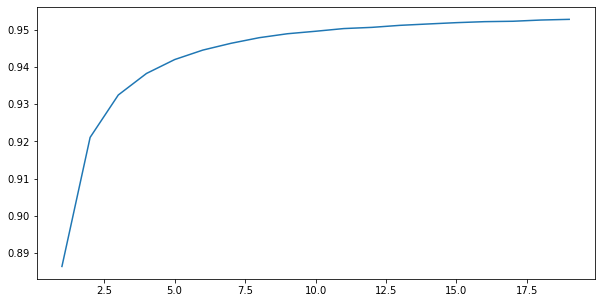

In [133]:
# List of scores
scores = []
x = 1
y = 20

# Iterate through 1 to 20 n_estimators
for i in range (x,y):
    reg = RandomForestRegressor(n_estimators=i
                                 ,n_jobs=-1
                                 ,random_state = 0)
    
    reg = reg.fit(X_train,Y_train.available_bikes)
    score = reg.score(X_test,Y_test.available_bikes)

    scores.append(score)
    
best = max(scores)
print("Highest score | n_estimators:", best, "|", (scores.index(best) + 1))
    
# Plot figure
plt.figure(figsize=[10,5])
plt.plot(range(x,y),scores)
plt.show()

### max_depth

Highest score | n_estimators: 0.9492878780518859 | 29


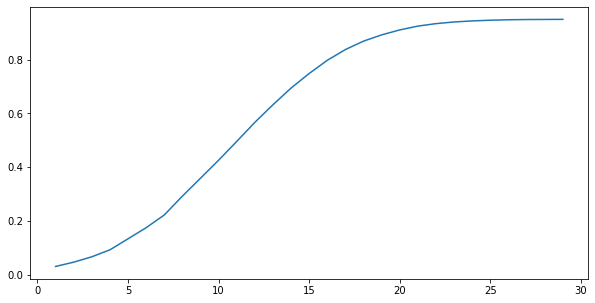

In [134]:
# List of scores
scores = []
x = 1
y = 30

# Iterate through 1 to 20 n_estimators
for i in range (x,y):
    reg = RandomForestRegressor(n_estimators=10
                                 ,n_jobs=-1
                                 ,random_state = 0
                               , max_depth=i)
    
    reg = reg.fit(X_train,Y_train.available_bikes)
    score =reg.score(X_test,Y_test.available_bikes)

    scores.append(score)
    
best = max(scores)
print("Highest score | n_estimators:", best, "|", (scores.index(best) + 1))
    
# Plot figure
plt.figure(figsize=[10,5])
plt.plot(range(x,y),scores)
plt.show()

### max_features

Highest score | n_estimators: 0.9489508425974758 | 14


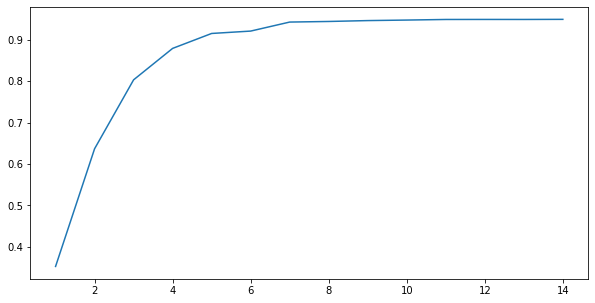

In [135]:
# List of scores
scores = []
x = 1
y = 15

# Iterate through 1 to 20 n_estimators
for i in range (x,y):
    reg = RandomForestRegressor(n_estimators=10
                                 ,n_jobs=-1
                                 ,random_state = 0
                               , max_depth=28
                               , max_features=i)
    
    reg = reg.fit(X_train,Y_train.available_bikes)
    score =reg.score(X_test,Y_test.available_bikes)

    scores.append(score)
    
best = max(scores)
print("Highest score | n_estimators:", best, "|", (scores.index(best) + 1))
    
# Plot figure
plt.figure(figsize=[10,5])
plt.plot(range(x,y),scores)
plt.show()

### Test model again with optimised arguments

In [136]:
# Train model
regForest = RandomForestRegressor(random_state=0
                                 , n_estimators=10
                                 , max_depth=28
                                , max_features=14)

regForest = regForest.fit(X_train, Y_train.available_bikes)

In [137]:
# Make predictions
print("Time taken: " + str(time.time()-tp1))

# Print metrics
print("MAE: ", metrics.mean_absolute_error(Y_test, prediction3))
print("RMSE: ", metrics.mean_squared_error(Y_test, prediction3))
print("R2: ", metrics.r2_score(Y_test, prediction3))

Time taken: 232.99689316749573
MAE:  9.906471624291314
RMSE:  154.3891370041432
R2:  -0.9383266637622707


## Testing the ML model

### Target: available bikes

In [138]:
# test = np.array(prediction3)
test = []
for i in prediction3:
    test.append(i)
    
rounded_prediction = [round(num) for num in test]
rounded_prediction[5:15]

[12, 5, 31, 2, 12, 8, 10, 36, 19, 14]

In [139]:
Y_test[5:15]

,available_bikes
229807,8
292096,23
235619,1
254308,10
221703,6
22118,15
200108,19
221350,15
171074,19
182266,15


### Target: available bike stands

In [140]:
# Re-split data
X_train, X_test, Y_train, Y_test = train_test_split(trainData, target2, test_size=0.3)

# Train model
regForest = RandomForestRegressor(random_state=0
                                 , n_estimators=10
                                 , max_depth=28
                                , max_features=14)

regForest = regForest.fit(X_train, Y_train.available_stands)

# Make predictions
prediction4 = regForest.predict(X_test)

# Print metrics
print("MAE: ", metrics.mean_absolute_error(Y_test, prediction4))
print("RMSE: ", metrics.mean_squared_error(Y_test, prediction4))
print("R2: ", metrics.r2_score(Y_test, prediction4))

MAE:  1.2329294571997407
RMSE:  4.0915460657798075
R2:  0.9646443283349931


In [141]:
# test = np.array(prediction3)
test = []
for i in prediction4:
    test.append(i)
    
rounded_prediction = [round(num) for num in test]
rounded_prediction[10:20]

[25, 37, 18, 29, 28, 24, 22, 29, 25, 19]

In [142]:
Y_test[10:20]

,available_stands
319006,26
308223,38
90007,18
54842,29
77215,32
179787,28
62837,23
21787,29
3775,25
311492,20


In [ ]:
array = np.array([[2,]])
available bikes and stands for
tomorrow thursday 15th of april at 5 pm

## Conclusion

Model used

In [161]:

  
# dictionary of lists 
a = [[2,3,4],[5,6,7]]
    
df = pd.DataFrame(a)
    
print(type(df.loc[[0]].values))

<class 'numpy.ndarray'>


In [235]:
import numpy as np
array = [1,2,3]
trainData = [array]

a = np.array(trainData)
a

array([[1, 2, 3]])

In [171]:
X_test.values

array([[6.00e+01, 7.00e+00, 1.60e+01, ..., 1.00e+02, 0.00e+00, 0.00e+00],
       [2.60e+01, 7.00e+00, 2.10e+01, ..., 5.18e+01, 0.00e+00, 0.00e+00],
       [4.40e+01, 3.00e+00, 1.70e+01, ..., 6.72e+01, 0.00e+00, 0.00e+00],
       ...,
       [1.09e+02, 5.00e+00, 2.10e+01, ..., 1.44e+01, 0.00e+00, 0.00e+00],
       [1.00e+01, 3.00e+00, 5.00e+00, ..., 1.00e+02, 0.00e+00, 0.00e+00],
       [9.50e+01, 5.00e+00, 1.10e+01, ..., 1.00e+02, 0.00e+00, 1.00e-01]])

In [172]:
df

,0,1,2
0,2,3,4
1,5,6,7


In [174]:
df = pd.read_csv('stations.csv', index_col=0)
df.head()

,name,address,position_lat,position_long,status,bike_stands,banking,bonus
station_id,,,,,,,,
2,BLESSINGTON STREET,Blessington Street,53.356769,-6.268140,OPEN,20,0,0
3,BOLTON STREET,Bolton Street,53.351182,-6.269859,OPEN,20,0,0
4,GREEK STREET,Greek Street,53.346874,-6.272976,OPEN,20,0,0
5,CHARLEMONT PLACE,Charlemont Street,53.330662,-6.260177,OPEN,40,0,0
6,CHRISTCHURCH PLACE,Christchurch Place,53.343368,-6.270120,OPEN,20,0,0


# New SQL Query Dataset

In [329]:
prediction_dataset = pd.read_csv('testDataset.csv')
prediction_dataset.head()

,station_id,last_timestamp,day_index,hour_index,bikes,stands,temperature,wind_speed,humidity,pressure_hPa,cloudiness,precipitation_mm,precipitation_probability,weather_symbol
0,2,1647626400,6,18,1,19,9.8,7.56,76.4,1040.4,0.0,0.0,0.0,1
1,2,1647630000,6,19,2,18,9.2,7.56,76.2,1040.5,0.0,0.0,0.0,1
2,2,1647633600,6,20,1,19,7.9,17.64,86.8,1040.7,1.6,0.0,0.0,1
3,2,1647637200,6,21,3,18,7.5,10.80,89.8,1040.2,2.8,0.0,0.0,1
4,2,1647640800,6,22,1,19,7.2,9.00,92.5,1039.6,18.3,0.0,0.0,2


In [338]:
prediction_dataset.dtypes

station_id                     int64
day_index                      int64
hour_index                     int64
bikes                          int64
stands                         int64
temperature                  float64
wind_speed                   float64
humidity                     float64
pressure_hPa                 float64
cloudiness                   float64
precipitation_mm             float64
precipitation_probability    float64
weather_symbol                 int64
dtype: object

In [330]:
prediction_dataset = prediction_dataset.drop(['last_timestamp'], axis=1)
prediction_dataset['station_id'] = prediction_dataset['station_id'].astype("int64")
prediction_dataset['bikes'] = prediction_dataset['bikes'].astype("int64")
prediction_dataset['stands'] = prediction_dataset['stands'].astype("int64")
df = prediction_dataset
df.head()

,station_id,day_index,hour_index,bikes,stands,temperature,wind_speed,humidity,pressure_hPa,cloudiness,precipitation_mm,precipitation_probability,weather_symbol
0,2,6,18,1,19,9.8,7.56,76.4,1040.4,0.0,0.0,0.0,1
1,2,6,19,2,18,9.2,7.56,76.2,1040.5,0.0,0.0,0.0,1
2,2,6,20,1,19,7.9,17.64,86.8,1040.7,1.6,0.0,0.0,1
3,2,6,21,3,18,7.5,10.80,89.8,1040.2,2.8,0.0,0.0,1
4,2,6,22,1,19,7.2,9.00,92.5,1039.6,18.3,0.0,0.0,2


In [334]:
trainFeatures = ['station_id', 'day_index', 'hour_index', 
                    'weather_symbol', 'temperature', 'wind_speed', 
                    'humidity', 'pressure_hPa', 'cloudiness', 'precipitation_mm'
                    , 'precipitation_probability']

# Model Targets; available_bikes and available_stands
targetFeature1 = ['bikes']
targetFeature2 = ['stands']

# New dataframes
trainData = df[trainFeatures]
target1 = df[targetFeature1]
target2 = df[targetFeature2]

# Split training and testing dataset
# targetFeature1 ('available_bikes')
X_train, X_test, Y_train, Y_test = train_test_split(trainData, target1, test_size=0.01)

# targetFeature2 ('available_stands')
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(trainData, target2, test_size=0.01)



## Random Forest Regression

In [336]:
# Random Forest Regression Model
# targetFeature1 ('available_bikes')
regForest = RandomForestRegressor(random_state=0
                            , n_estimators=10
                            , max_depth=28
                            , max_features=11)
regForest = regForest.fit(X_train, Y_train.bikes)

# Make predictions
prediction4 = regForest.predict(X_test)

# Print metrics
print("MAE: ", metrics.mean_absolute_error(Y_test, prediction4))
print("RMSE: ", metrics.mean_squared_error(Y_test, prediction4))
print("R2: ", metrics.r2_score(Y_test, prediction4))

MAE:  3.190931067576122
RMSE:  18.483840946368073
R2:  0.7792603785217433
